In [1]:
# !pip install -e ..

%load_ext autoreload
%autoreload 2

import time
import pandas as pd
from bokeh.io import output_notebook
output_notebook();
import matplotlib.pyplot as plt

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

df = pd.read_csv("../test/test_data/TestSpectrumDf.tsv", sep="\t")
df.head(3)

Loading BokehJS ...

,mz,intensity,ion_mobility,ion_annotation,ion_mobility_unit,precursor_mz,precursor_charge,native_id,spectrum,color_peak,custom_annotation,color_annotation,sequence
0,50.9890,10,2,a+,ms,221.08,1,spec_0,A,green,custom1,blue,DMAGCH
1,74.1324,20,4,b3+,ms,221.08,1,spec_0,A,green,custom2,blue,DMAGCH
2,100.5332,25,17,c5+,ms,221.08,1,spec_0,B,red,custom3,red,DMAGCH


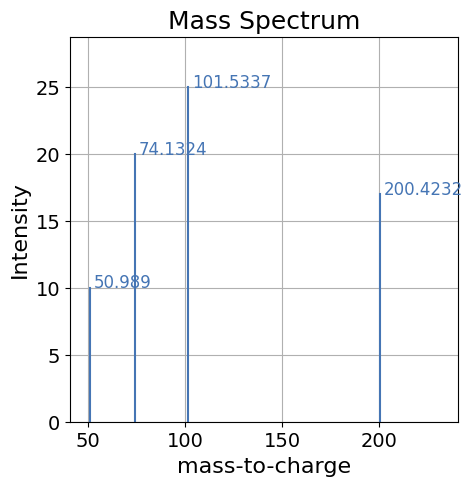

In [2]:
# default settings, top 5 intensity peaks are annotated with m/z and peaks are binned
df.plot(x="mz", y="intensity", kind="spectrum")

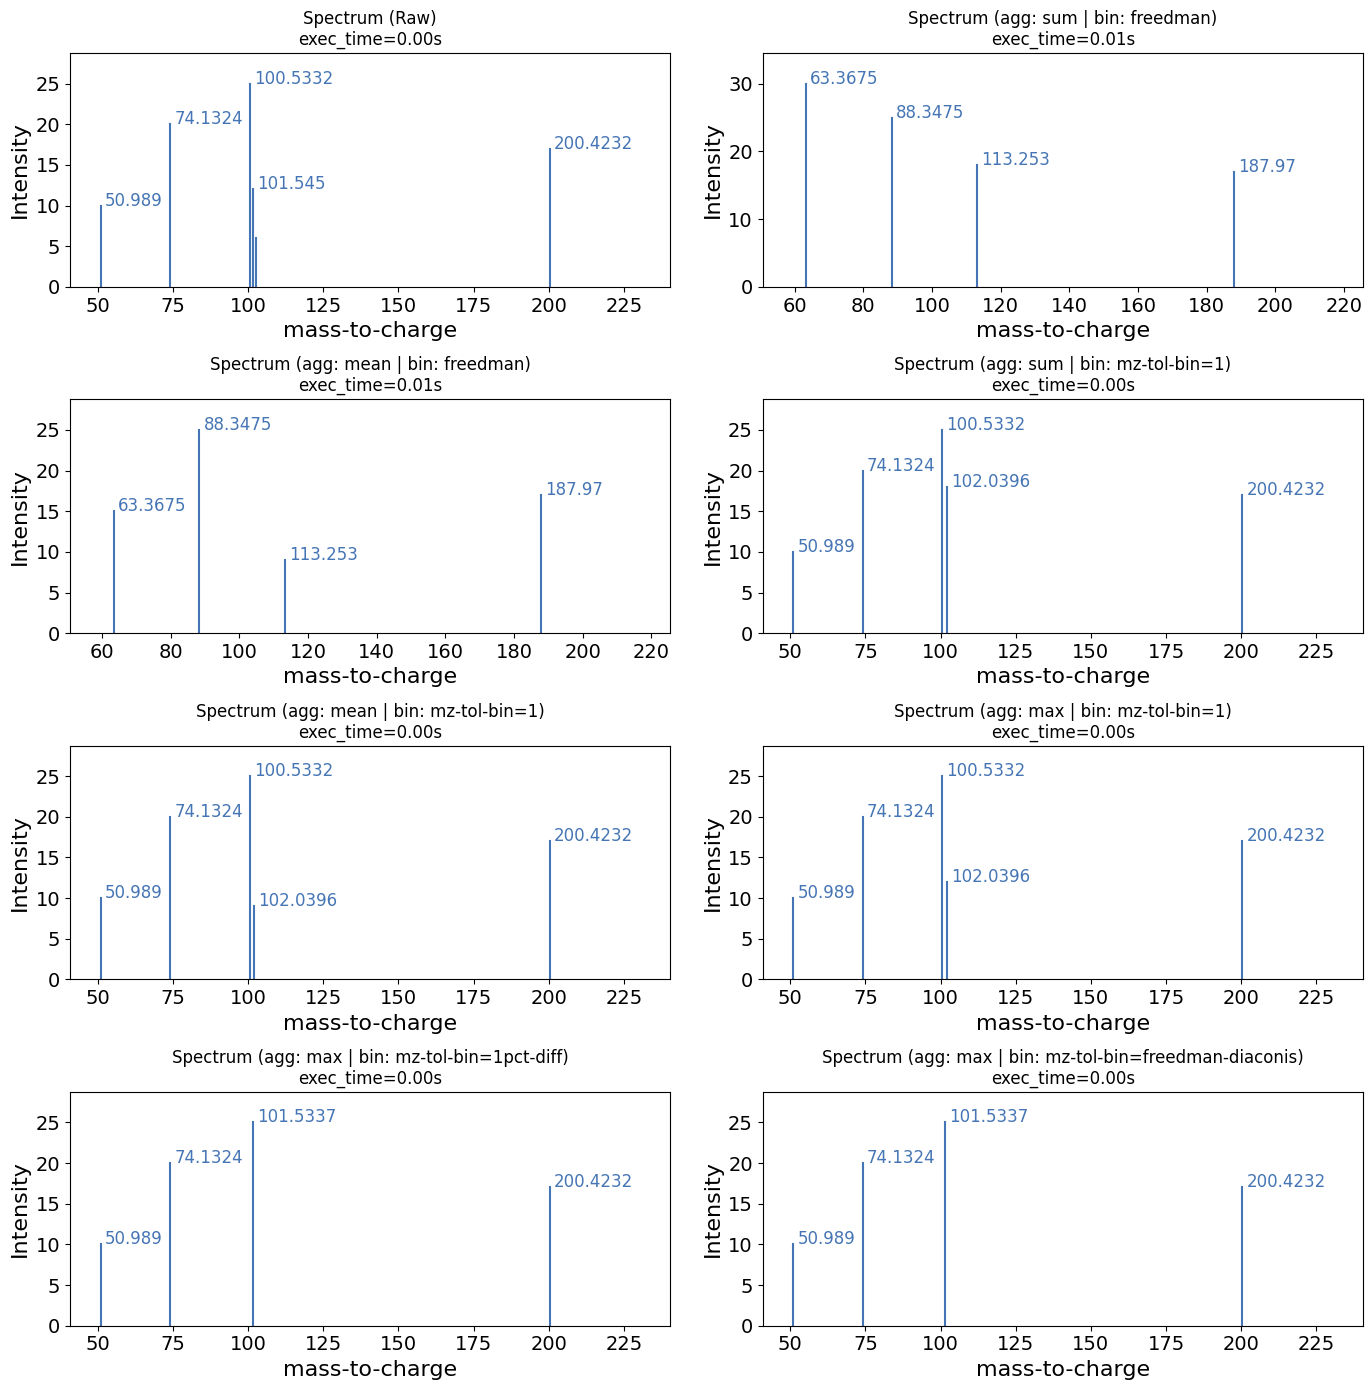

In [3]:
# Let's assess the peak binning and create a 4 by 2 subplot to visualize the different methods of binning
params_list = [
    {'title':'Spectrum (Raw)', 'bin_peaks':False},
    {'title':'Spectrum (agg: sum | bin: freedman)', 'bin_peaks':'auto', 'bin_method':'freedman-diaconis', 'aggregation_method':"sum"},
    {'title':'Spectrum (agg: mean | bin: freedman)', 'bin_peaks':'auto', 'bin_method':'freedman-diaconis', 'aggregation_method':"mean"},
    {'title':'Spectrum (agg: sum | bin: mz-tol-bin=1)', 'bin_peaks':'auto', 'bin_method':'mz-tol-bin', 'mz_tol':1, 'aggregation_method':"sum"},
    {'title':'Spectrum (agg: mean | bin: mz-tol-bin=1)', 'bin_peaks':'auto', 'bin_method':'mz-tol-bin', 'mz_tol':1, 'aggregation_method':"mean"},
    {'title':'Spectrum (agg: max | bin: mz-tol-bin=1)', 'bin_peaks':'auto', 'bin_method':'mz-tol-bin', 'mz_tol':1, 'aggregation_method':"max"},
    {'title':'Spectrum (agg: max | bin: mz-tol-bin=1pct-diff)', 'bin_peaks':'auto', 'bin_method':'mz-tol-bin', 'mz_tol':'1pct-diff', 'aggregation_method':"max"},
    {'title':'Spectrum (agg: max | bin: mz-tol-bin=freedman-diaconis)', 'bin_peaks':'auto', 'bin_method':'mz-tol-bin', 'mz_tol':'freedman-diaconis', 'aggregation_method':"max"},
]

# Create a 3-row subplot
fig, axs = plt.subplots(4, 2, figsize=(14, 14))

# Close the figure to suppress initial empty display
plt.close()

p_list = []
i = j = 0
for params in params_list:
    # print("-"*100)
    # print(f"Params: {params}")
    start_time = time.time()
    p = df.plot(kind="spectrum", x="mz", y="intensity", 
            fig=axs[i][j], grid=False, 
            **params
            )
    end_time = time.time()
    elapsed_time = end_time - start_time
    # print(f'Execution time: {elapsed_time:.6f} seconds')
    p.fig.set_title(f"{params['title']}\nexec_time={elapsed_time:.2f}s")
    p_list.append(p)
    j += 1
    if j >= 2:  # If we've filled two columns, move to the next row
        j = 0
        i += 1  
fig.tight_layout()
fig

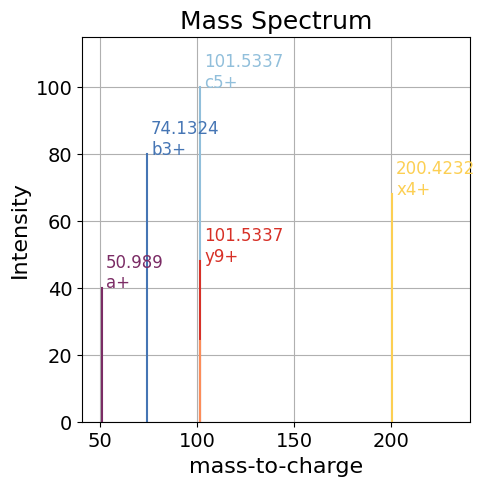

In [4]:
# ion annotations with default colors and relative intensite
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", relative_intensity=True)

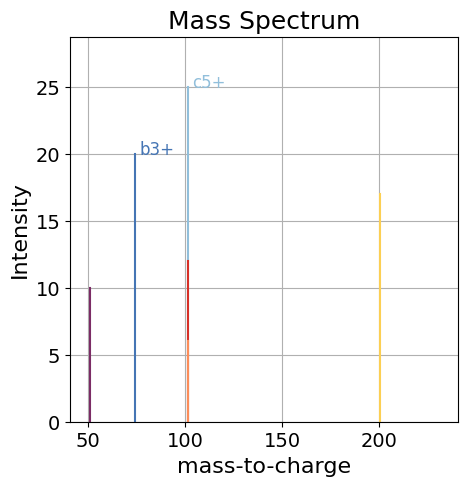

In [5]:
# annotating top 2 intensity peaks only and hiding m/z annotations(default is 5)
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", annotate_mz=False, annotate_top_n_peaks=2)

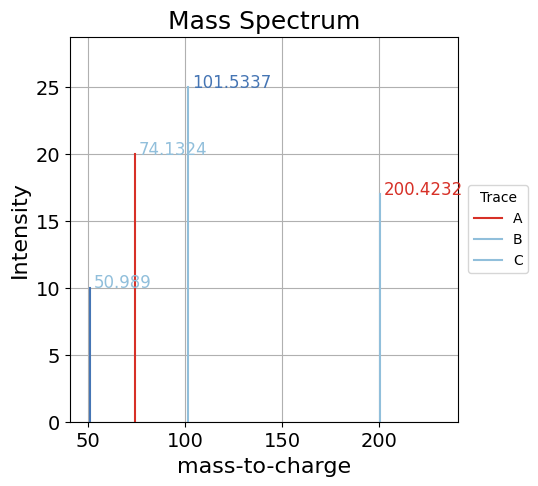

In [6]:
# grouping peaks, each group gets different color, show legend
df.plot(x="mz", y="intensity", kind="spectrum", by="spectrum")

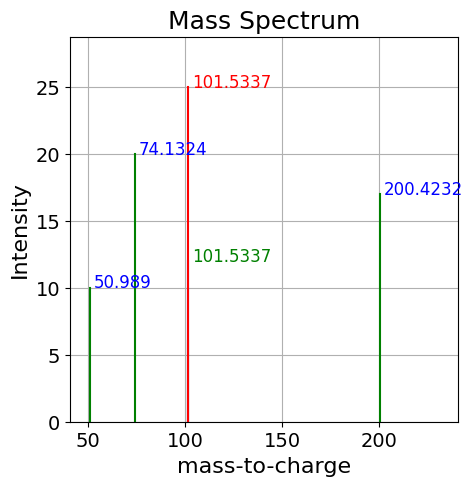

In [7]:
# custom annotation and peak colors based on columns in dataframe
df.plot(x="mz", y="intensity", kind="spectrum",
       annotation_color="color_annotation", peak_color="color_peak")

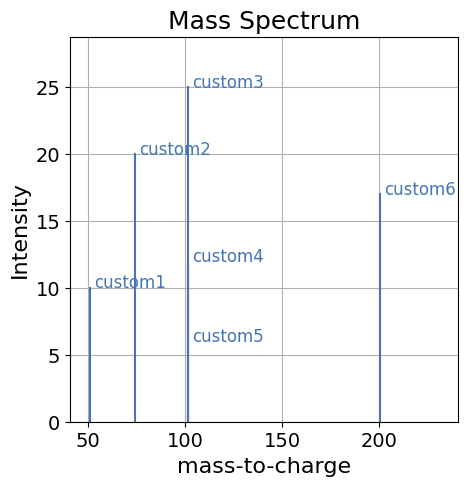

In [8]:
# custom annoation for all peaks without mz annotation
df.plot(x="mz", y="intensity", kind="spectrum",
       custom_annotation="custom_annotation", annotate_mz=False, annotate_top_n_peaks="all")

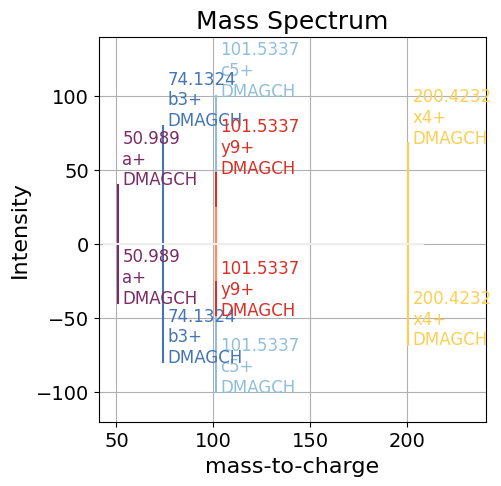

In [9]:
# mirror a reference spectrum with ion and sequence annoations
df.plot(x="mz", y="intensity", kind="spectrum",
        ion_annotation="ion_annotation", sequence_annotation="sequence",
        reference_spectrum=df, mirror_spectrum=True)